# <span style = "color: green" >Simple Linear Regression Project (Gold Price Prediction) </span>

***

Of all the precious metals, gold is the most popular as an investment. Investors generally buy gold as a way of diversifying risk, especially through the use of futures contracts and derivatives. The gold market is subject to speculation and volatility as are other markets. Compared to other precious metals used for investment, gold has been the most effective safe haven across a number of countries.<br><br>
The Dataset contain gold prices (in USD) from 2001 to 2019.
Our goal is to predict where the gold prices will be in the coming years

#### Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np

#### Read 'gold_price_usd.csv' & store it in a variable

In [2]:
df= pd.read_csv('gold_price_usd.csv')

#### View the first 5 rows

In [3]:
df.head()

,Date,USD (AM)
0,2001-01-02,272.80
1,2001-01-03,269.00
2,2001-01-04,268.75
3,2001-01-05,268.00
4,2001-01-08,268.60


#### Check the information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4718 non-null   object 
 1   USD (AM)  4718 non-null   float64
dtypes: float64(1), object(1)
memory usage: 73.8+ KB


#### Find the columns

In [5]:
df.columns

Index(['Date', 'USD (AM)'], dtype='object')

#### Rename USD (AM) to Price

In [6]:
df['Price']= df['USD (AM)']
df.drop(labels='USD (AM)',axis=1, inplace= True)
df.head()

,Date,Price
0,2001-01-02,272.80
1,2001-01-03,269.00
2,2001-01-04,268.75
3,2001-01-05,268.00
4,2001-01-08,268.60


#### Check if there are any missing values in the dataset

In [7]:
df.isna().sum().sum()

0

#### Gather the basic statistical information about the dataset

In [8]:
df.describe()

,Price
count,4718.000000
mean,959.990812
std,449.456217
min,256.700000
25%,449.112500
50%,1113.125000
75%,1293.750000
max,1896.500000


#### Convert Date column from object to datetime format

In [9]:
df.head()

,Date,Price
0,2001-01-02,272.80
1,2001-01-03,269.00
2,2001-01-04,268.75
3,2001-01-05,268.00
4,2001-01-08,268.60


In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Date']=df['Date'].dt.day
df.head()

,Date,Price,Year,Month
0,2,272.80,2001,1
1,3,269.00,2001,1
2,4,268.75,2001,1
3,5,268.00,2001,1
4,8,268.60,2001,1


In [12]:
df=df[['Price','Date','Month','Year']]
df.head()

,Price,Date,Month,Year
0,272.80,2,1,2001
1,269.00,3,1,2001
2,268.75,4,1,2001
3,268.00,5,1,2001
4,268.60,8,1,2001


#### Create a new column with Year

In [13]:
df.head()

,Price,Date,Month,Year
0,272.80,2,1,2001
1,269.00,3,1,2001
2,268.75,4,1,2001
3,268.00,5,1,2001
4,268.60,8,1,2001


#### Create a new column with Months

In [14]:
df.head()

,Price,Date,Month,Year
0,272.80,2,1,2001
1,269.00,3,1,2001
2,268.75,4,1,2001
3,268.00,5,1,2001
4,268.60,8,1,2001


#### See all the years and Months in our dataset

In [15]:
df['Year'].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

In [16]:
#Months
df['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

## <span style = "color: orange" >Visualization</span>

### Create a regression plot with x-axis as years and y-axis as Price

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

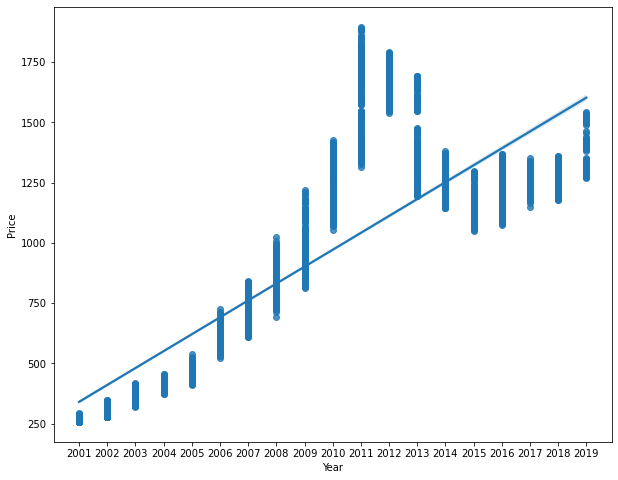

In [18]:
plt.figure(figsize = (10,8))
#Year= [, 2017, 2018, 2019]
sns.regplot(x = df["Year"], y = df["Price"])
#plt.xticks([ 2002,  2004,  2006,  2008,  2010, 2012,  2014,  2016, 2018])
plt.xticks([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,2012, 2013, 2014, 2015, 2016,2017,2018,2019])
plt.show()

### Plot a histplot to find the variation in price

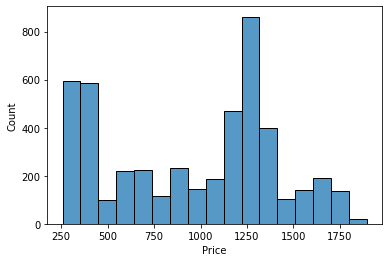

In [19]:
sns.histplot(data= df,x="Price")
plt.show()

### Assign year and price in x and y variables

In [20]:
X = df[['Year']]
y = df['Price']

### Split the data into traning and testin set

We will train our model on the training set and then use the test set to evaluate the model

In [21]:
# import train_test split
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=100)
X_train.head()

,Year
683,2003
2119,2009
4615,2019
662,2003
4159,2017


## Train Data

In [23]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

### Create Linear Regression Model

In [24]:
linear=LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

### Train the  model

### Check the score of our model

In [25]:
linear.score(X_train, y_train)

0.7048691960223041

In [26]:
linear.score(X_test, y_test)

0.712548188045684

### Check the coefficient and Intercept

In [27]:
#print the intercept
print(linear.intercept_)
print(linear.coef_)

-140074.32374779374
[70.17366927]


In [28]:
#print the coefficent
linear.coef_

array([70.17366927])

### Make Prediction with Test data

In [29]:
# Also store the predicted values in a variable
linear.predict(X_test)
prediction=linear.predict(X_test)
prediction

array([ 553.70946788,  413.36212934, 1185.27249131, ..., 1115.09882204,
        343.18846007, 1536.14083765])

### Create a new dataframe with actual and predicted values with year(X_test) as index

In [30]:
X_test

,Year
962,2004
403,2002
3220,2013
1588,2007
2065,2009
...,...
2237,2009
3262,2013
2817,2012
252,2001


In [31]:
Actual=X_test['Year'].values
new_df=pd.DataFrame(zip(y_test.values,prediction), index = Actual)
new_df

,0,1
2004,425.50,553.709468
2002,307.80,413.362129
2013,1335.75,1185.272491
2007,687.25,764.230476
2009,924.75,904.577814
...,...,...
2009,1088.00,904.577814
2013,1250.75,1185.272491
2012,1776.50,1115.098822
2001,276.50,343.188460


### Check the mean absolute error, mean square error

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [33]:
# Mean absolute error
mean_squared_error(y_test, prediction)

58032.97376893121

In [34]:
# Mean squared error
mean_absolute_error(y_test, prediction)


186.2427389387367

In [35]:
r2_score(y_test, prediction)

0.712548188045684

### Predict the prices for the following years
   * 2025, 2026, 2027, 2028, 2030

In [36]:
new_year=[2025,2026,2027,2028,2030]
bd=pd.DataFrame(new_year)
bd


,0
0,2025
1,2026
2,2027
3,2028
4,2030


In [119]:
linear.predict(bd)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2027.35652254, 2097.53019181, 2167.70386108, 2237.87753035,
       2378.22486888])

In [39]:
linear.predict([[2025],[2026]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2027.35652254, 2097.53019181])

In [124]:
(70.17366927 * 2030) -140074.32374

2378.224878100009

***

# <span style = "color:green;font-size:40px"> Great Job!</span>